## Credmark Modeling Framework - Transaction Network Analysis - Tag

- Author: Kunlun
- Version: 2022.07.14


In [1]:
%reload_ext credmark.cmf.ipython

cmf_param = {
    'chain_id': 1,
    'block_number': None,
    'chain_to_provider_url': {},
    'api_url': None,
    'use_local_models': None,
    'register_utility_global': True}

context, model_loader = %cmf cmf_param

from models.credmark.tokens.transaction import plot_dig, create_graph_from_txn, classify_dig

## Load Transaction from Ledger or files


In [2]:
load_from_ledger = False

if load_from_ledger:
    context,_ = %cmf param

    def get_transaction(txn_hash):
        with context.ledger.TokenTransfer as q:
            df_txn = q.select(columns=q.columns,
                        where=q.TRANSACTION_HASH.eq(txn_hash)).to_dataframe()
        return df_txn

    df4 = get_transaction('0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbff41af0f3ac88b590aa34')
    df5 = get_transaction('0x6d311b818df10c6120a38487bc6d93a995bd9b95a6989bcd4f5b036eba466ebc')
    df6 = get_transaction('0x9534191274052b29fe42210f1544097b1782f50b25cd03f5301f8e547b74eb1c')
    df7 = get_transaction('0xff9939b22afc969eb1d1e8640527ca156a1cfb011fcf794290f52089e2e9f693')
    df8 = get_transaction('0x7ee67c4b2b5540a503fdf3b2f3a44c955c22884c0e286f5d89e67d4d8989264a')
    df9 = get_transaction('0x8544afeaa6738823a62203b2b72dafd9d637e28fb5bf345a6de6accac1cc30ba')
    df4.to_csv('df4.csv', index=False)
    df5.to_csv('df5.csv', index=False)
    df6.to_csv('df6.csv', index=False)
    df7.to_csv('df7.csv', index=False)
    df8.to_csv('df8.csv', index=False)
    df9.to_csv('df9.csv', index=False)
else:
    df4 = pd.read_csv('df4.csv')
    df5 = pd.read_csv('df5.csv')
    df6 = pd.read_csv('df6.csv')
    df7 = pd.read_csv('df7.csv')
    df8 = pd.read_csv('df8.csv')
    df9 = pd.read_csv('df9.csv')

    display(df4)    

,block_number,from_address,log_index,token_address,to_address,transaction_hash,value
0,15125867,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,7,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x08f68110f1e0ca67c80a24b4bd206675610f445d,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4820143723
1,15125867,0x08f68110f1e0ca67c80a24b4bd206675610f445d,1,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,1844102876259671339
2,15125867,0x5777d92f208679db4b9778590fa3cab3ac9e2168,0,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4835192242
3,15125867,0xb63cac384247597756545b500253ff8e607a8020,3,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,0x055475920a8c93cffb64d039a8205f7acc7722d3,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,345335597976
4,15125867,0x055475920a8c93cffb64d039a8205f7acc7722d3,4,0x6b175474e89094c44da98b954eedeac495271d0f,0x5777d92f208679db4b9778590fa3cab3ac9e2168,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4835471113735542742314
5,15125867,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,2,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,0x0000000000000000000000000000000000000000,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,1844102691849383713


## Test dig


In [3]:
def txn_analysis(param, df_txn):
    param = param | {'block_number': df_txn.block_number.to_list()[0]}
    context,_ = %cmf param

    dig = create_graph_from_txn(df_txn)
    plot_dig(dig)
    df_txn_new = classify_dig(context.logger, dig, df_txn, debug=False)
    display(df_txn_new)

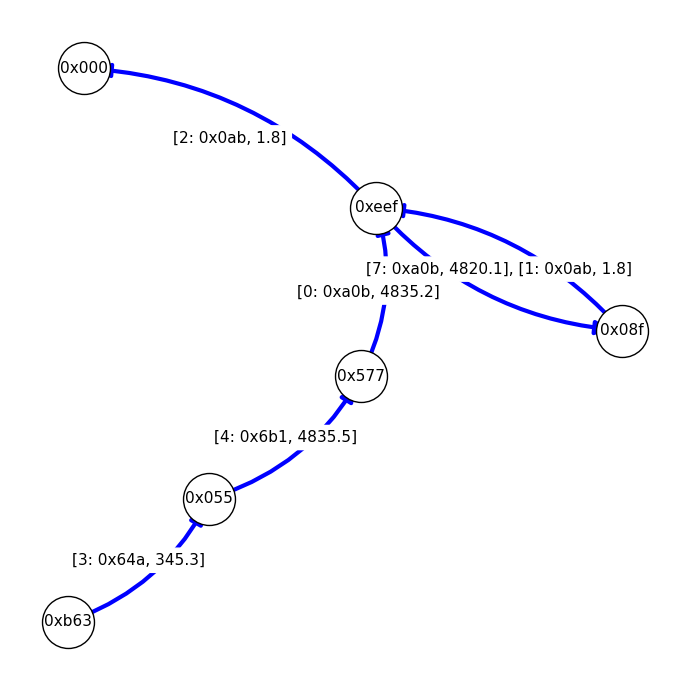

,block_number,from_address,log_index,token_address,to_address,transaction_hash,value,type,value_scaled
0,15125867,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,7,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x08f68110f1e0ca67c80a24b4bd206675610f445d,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4820143723,swap_out,4820.143723
1,15125867,0x08f68110f1e0ca67c80a24b4bd206675610f445d,1,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,1844102876259671339,swap_in,1.844103
2,15125867,0x5777d92f208679db4b9778590fa3cab3ac9e2168,0,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4835192242,"[link_11_out, link_nn_in]",4835.192242
3,15125867,0xb63cac384247597756545b500253ff8e607a8020,3,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,0x055475920a8c93cffb64d039a8205f7acc7722d3,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,345335597976,in,345.335598
4,15125867,0x055475920a8c93cffb64d039a8205f7acc7722d3,4,0x6b175474e89094c44da98b954eedeac495271d0f,0x5777d92f208679db4b9778590fa3cab3ac9e2168,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4835471113735542742314,"[link_11_in, link_11_out]",4835.471114
5,15125867,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,2,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,0x0000000000000000000000000000000000000000,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,1844102691849383713,out,1.844103


In [4]:
txn_analysis(cmf_param, df4)

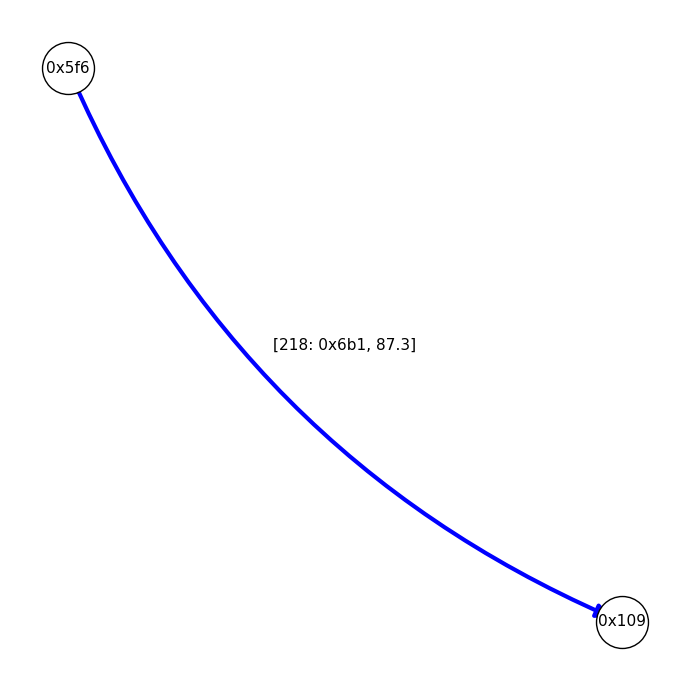

,block_number,from_address,log_index,token_address,to_address,transaction_hash,value,type,value_scaled
0,14162484,0x5f65f7b609678448494de4c87521cdf6cef1e932,218,0x6b175474e89094c44da98b954eedeac495271d0f,0x109b3c39d675a2ff16354e116d080b94d238a7c9,0x6d311b818df10c6120a38487bc6d93a995bd9b95a698...,87308535000000000000,transfer,87.308535


In [5]:
txn_analysis(cmf_param, df5)

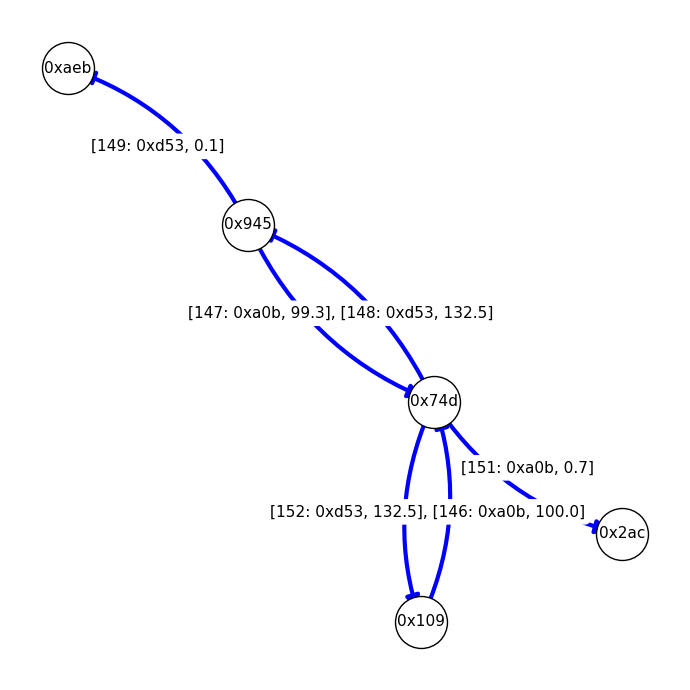

,block_number,from_address,log_index,token_address,to_address,transaction_hash,value,type,value_scaled
0,15062673,0x74de5d4fcbf63e00296fd95d33236b9794016631,151,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x2acf35c9a3f4c5c3f4c78ef5fb64c3ee82f07c45,0x9534191274052b29fe42210f1544097b1782f50b25cd...,743000,out,0.743000
1,15062673,0x74de5d4fcbf63e00296fd95d33236b9794016631,152,0xd533a949740bb3306d119cc777fa900ba034cd52,0x109b3c39d675a2ff16354e116d080b94d238a7c9,0x9534191274052b29fe42210f1544097b1782f50b25cd...,132490676976605020000,swap_out,132.490677
2,15062673,0x109b3c39d675a2ff16354e116d080b94d238a7c9,146,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x9534191274052b29fe42210f1544097b1782f50b25cd...,100000000,swap_in,100.000000
3,15062673,0x74de5d4fcbf63e00296fd95d33236b9794016631,147,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x945bcf562085de2d5875b9e2012ed5fd5cfab927,0x9534191274052b29fe42210f1544097b1782f50b25cd...,99257000,"[link_1n_in, link_nn_out]",99.257000
4,15062673,0x945bcf562085de2d5875b9e2012ed5fd5cfab927,148,0xd533a949740bb3306d119cc777fa900ba034cd52,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x9534191274052b29fe42210f1544097b1782f50b25cd...,132490676976605020000,"[link_1n_out, link_nn_in]",132.490677
5,15062673,0x945bcf562085de2d5875b9e2012ed5fd5cfab927,149,0xd533a949740bb3306d119cc777fa900ba034cd52,0xaeb0e11e7c21715b4e8f3425cb3d4978e5a7cf11,0x9534191274052b29fe42210f1544097b1782f50b25cd...,92743473883623514,out,0.092743


In [6]:
txn_analysis(cmf_param, df6)

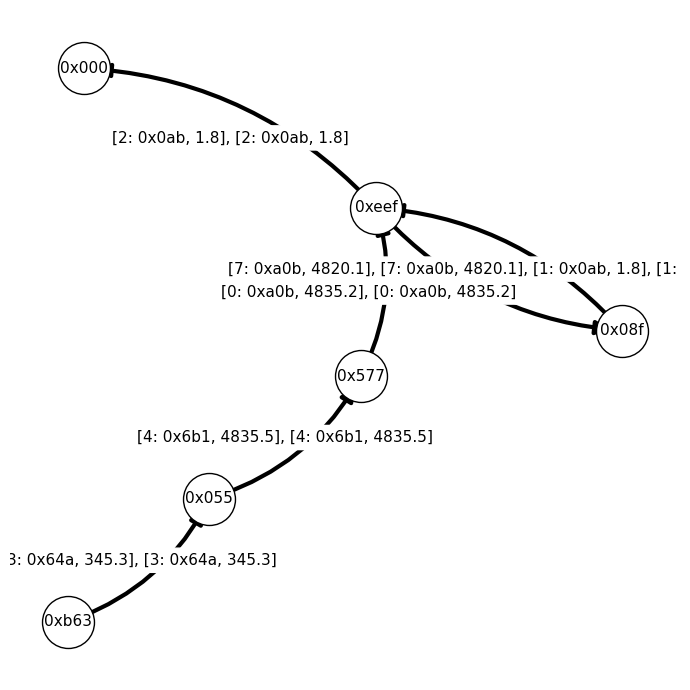

,block_number,from_address,log_index,token_address,to_address,transaction_hash,value,type,value_scaled
0,15125867,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,7,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x08f68110f1e0ca67c80a24b4bd206675610f445d,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4820143723,swap_out,4820.143723
1,15125867,0x08f68110f1e0ca67c80a24b4bd206675610f445d,1,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,1844102876259671339,swap_in,1.844103
2,15125867,0x5777d92f208679db4b9778590fa3cab3ac9e2168,0,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4835192242,"[link_11_out, link_nn_in]",4835.192242
3,15125867,0xb63cac384247597756545b500253ff8e607a8020,3,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,0x055475920a8c93cffb64d039a8205f7acc7722d3,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,345335597976,in,345.335598
4,15125867,0x055475920a8c93cffb64d039a8205f7acc7722d3,4,0x6b175474e89094c44da98b954eedeac495271d0f,0x5777d92f208679db4b9778590fa3cab3ac9e2168,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4835471113735542742314,"[link_11_in, link_11_out]",4835.471114
5,15125867,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,2,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,0x0000000000000000000000000000000000000000,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,1844102691849383713,out,1.844103
0,15125867,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,7,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x08f68110f1e0ca67c80a24b4bd206675610f445d,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4820143723,swap_out,4820.143723
1,15125867,0x08f68110f1e0ca67c80a24b4bd206675610f445d,1,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,1844102876259671339,swap_in,1.844103
2,15125867,0x5777d92f208679db4b9778590fa3cab3ac9e2168,0,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,4835192242,"[link_11_out, link_nn_in]",4835.192242
3,15125867,0xb63cac384247597756545b500253ff8e607a8020,3,0x64aa3364f17a4d01c6f1751fd97c2bd3d7e7f1d5,0x055475920a8c93cffb64d039a8205f7acc7722d3,0x319552805d5f3d0c97e7b6c1e40d0c42817c49406fbf...,345335597976,in,345.335598


In [7]:
txn_analysis(cmf_param, pd.concat([df4, df4]))

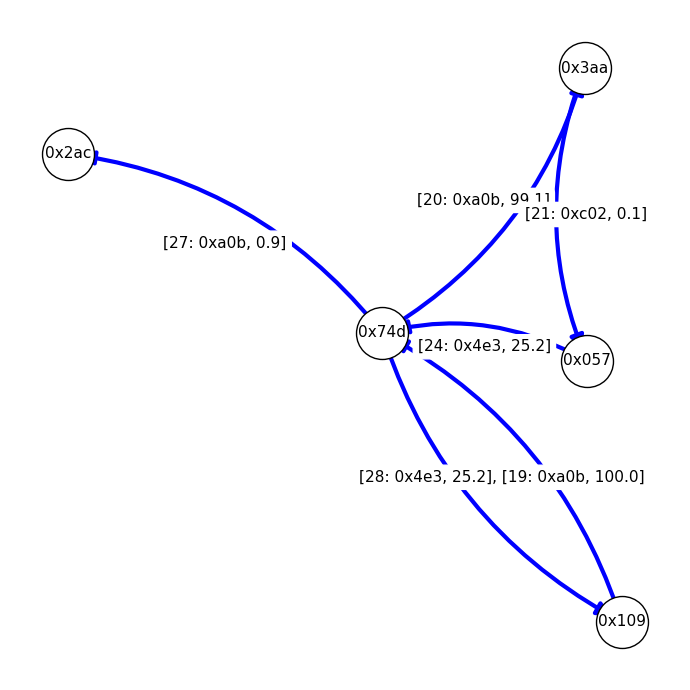

,block_number,from_address,log_index,token_address,to_address,transaction_hash,value,type,value_scaled
0,15067869,0x05767d9ef41dc40689678ffca0608878fb3de906,24,0x4e3fbd56cd56c3e72c1403e103b45db9da5b9d2b,0x74de5d4fcbf63e00296fd95d33236b9794016631,0xff9939b22afc969eb1d1e8640527ca156a1cfb011fcf...,25215818107322728974,"[link_11_out, link_nn_in]",25.215818
1,15067869,0x3aa370aacf4cb08c7e1e7aa8e8ff9418d73c7e0f,21,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x05767d9ef41dc40689678ffca0608878fb3de906,0xff9939b22afc969eb1d1e8640527ca156a1cfb011fcf...,93298121818934453,"[link_11_in, link_11_out]",0.093298
2,15067869,0x109b3c39d675a2ff16354e116d080b94d238a7c9,19,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x74de5d4fcbf63e00296fd95d33236b9794016631,0xff9939b22afc969eb1d1e8640527ca156a1cfb011fcf...,100000000,swap_in,100.000000
3,15067869,0x74de5d4fcbf63e00296fd95d33236b9794016631,28,0x4e3fbd56cd56c3e72c1403e103b45db9da5b9d2b,0x109b3c39d675a2ff16354e116d080b94d238a7c9,0xff9939b22afc969eb1d1e8640527ca156a1cfb011fcf...,25215818107322728974,swap_out,25.215818
4,15067869,0x74de5d4fcbf63e00296fd95d33236b9794016631,20,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x3aa370aacf4cb08c7e1e7aa8e8ff9418d73c7e0f,0xff9939b22afc969eb1d1e8640527ca156a1cfb011fcf...,99125000,"[link_11_in, link_nn_out]",99.125000
5,15067869,0x74de5d4fcbf63e00296fd95d33236b9794016631,27,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x2acf35c9a3f4c5c3f4c78ef5fb64c3ee82f07c45,0xff9939b22afc969eb1d1e8640527ca156a1cfb011fcf...,875000,out,0.875000


In [8]:
txn_analysis(cmf_param, df7)

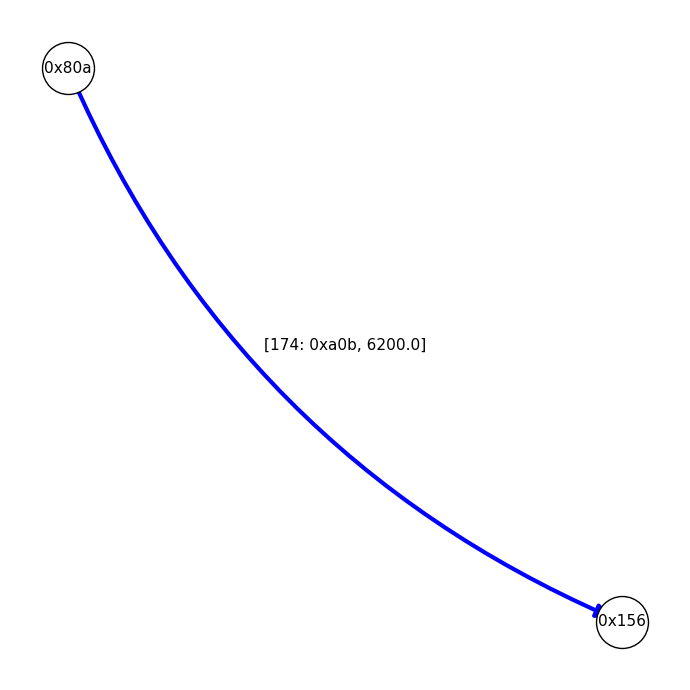

,block_number,from_address,log_index,token_address,to_address,transaction_hash,value,type,value_scaled
0,13984858,0x80aba9cd8b02b227f81d54ddded38290dbb23836,174,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x1567a34f731f323bc2411e4dcfbb58630428b887,0x7ee67c4b2b5540a503fdf3b2f3a44c955c22884c0e28...,6200000000,transfer,6200.0


In [9]:
txn_analysis(cmf_param, df8)

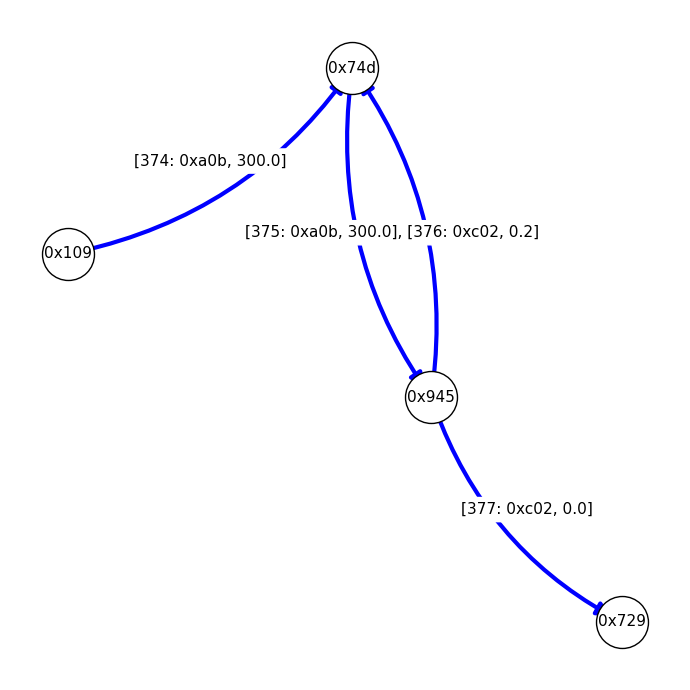

,block_number,from_address,log_index,token_address,to_address,transaction_hash,value,type,value_scaled
0,15209185,0x74de5d4fcbf63e00296fd95d33236b9794016631,375,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x945bcf562085de2d5875b9e2012ed5fd5cfab927,0x8544afeaa6738823a62203b2b72dafd9d637e28fb5bf...,300000000,"[link_1n_in, link_n1_out]",300.000000
1,15209185,0x945bcf562085de2d5875b9e2012ed5fd5cfab927,376,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x8544afeaa6738823a62203b2b72dafd9d637e28fb5bf...,197253302651154700,"[link_1n_out, link_n1_in]",0.197253
2,15209185,0x109b3c39d675a2ff16354e116d080b94d238a7c9,374,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x8544afeaa6738823a62203b2b72dafd9d637e28fb5bf...,300000000,in,300.000000
3,15209185,0x945bcf562085de2d5875b9e2012ed5fd5cfab927,377,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7296333e1615721f4bd9df1a3070537484a50cf8,0x8544afeaa6738823a62203b2b72dafd9d637e28fb5bf...,138077311855808,out,0.000138


In [10]:
txn_analysis(cmf_param, df9)